## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.Dataset

In [ ]:
dataset_airbnb =pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2022-09-13/data/listings.csv.gz")

In [ ]:
dataset_airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36664873,https://www.airbnb.com/rooms/36664873,20220913165728,2022-09-13,city scrape,Casa Ferry Holiday House Lisbon 15min & Beach ...,Our portuguese-style house with spacious terra...,Nice quiet village where the river meets the o...,https://a0.muscache.com/pictures/a49ce709-eaac...,275575455,...,4.90,4.76,4.71,42622/AL,t,1,1,0,0,0.56
1,589780527953985801,https://www.airbnb.com/rooms/589780527953985801,20220913165728,2022-09-13,city scrape,La Caz O Soleil de Lapa (sans cuisine),Oubliez vos soucis dans ce logement spacieux e...,"Quartier calme, restaurants a proximités, bar,...",https://a0.muscache.com/pictures/miso/Hosting-...,22145635,...,5.00,4.63,5.00,Exempt,f,1,0,1,0,2.14
2,25345952,https://www.airbnb.com/rooms/25345952,20220913165728,2022-09-14,city scrape,"La maison de la plage, et de la tranquillité",Maison en copropriété privée avec piscine parc...,NaN,https://a0.muscache.com/pictures/142e8803-1846...,175971197,...,4.83,4.28,4.64,Exempt,t,2,2,0,0,0.89
3,42095537,https://www.airbnb.com/rooms/42095537,20220913165728,2022-09-13,city scrape,New Inn Cacilhas - Shared Comfort Bed#2,It's a flat with 2 rooms: 1 private and 1 shar...,"A casa de Joana está localizada em Almada, Set...",https://a0.muscache.com/pictures/8fdac68b-e48b...,78069703,...,4.67,4.33,4.42,107023/AL,f,4,0,1,3,1.23
4,567287540530945227,https://www.airbnb.com/rooms/567287540530945227,20220913165728,2022-09-13,city scrape,"Cascais, Fabulous apartment in Luxury Condomin...",Located on the Marginal de Cascais – in Parede...,In the surroundings there are several commerci...,https://a0.muscache.com/pictures/prohost-api/H...,185689002,...,4.60,4.90,4.60,123277/AL,f,20,15,5,0,1.75


In [ ]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19651 entries, 0 to 19650
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19651 non-null  int64  
 1   listing_url                                   19651 non-null  object 
 2   scrape_id                                     19651 non-null  int64  
 3   last_scraped                                  19651 non-null  object 
 4   source                                        19651 non-null  object 
 5   name                                          19643 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         12526 non-null  object 
 8   picture_url                                   19651 non-null  object 
 9   host_id                                       19651 non-null 

# 2. Pre-processamento do Dataset

In [ ]:
# Dimensão do Dataset
print(f'number of rows: {dataset_airbnb.shape[0]}')
print(f'number of columns: {dataset_airbnb.shape[1]}')

number of rows: 19651
number of columns: 75


In [ ]:
# Visualizar os tipos de dados de cada coluna
dataset_airbnb.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [ ]:
# Criar um DataFrame com valores nulos, tipos de dados e contagem de valores únicos
nulos = pd.DataFrame({
    'null_values': dataset_airbnb.isnull().mean() * 100, # Porcentagem de valores nulos
    'unique_values': dataset_airbnb.nunique()           # Contagem de valores únicos
                    })

print(nulos)

                                              null_values  unique_values
id                                               0.000000          19651
listing_url                                      0.000000          19651
scrape_id                                        0.000000              1
last_scraped                                     0.000000              2
source                                           0.000000              2
...                                                   ...            ...
calculated_host_listings_count                   0.000000             54
calculated_host_listings_count_entire_homes      0.000000             51
calculated_host_listings_count_private_rooms     0.000000             28
calculated_host_listings_count_shared_rooms      0.000000             11
reviews_per_month                                9.841738            726

[75 rows x 2 columns]



Com base na tabela acima podemos ver que as variáveis 'bathrooms' e 'calendar_update' não apresentam qualquer valor e a variável 'scrape_id' tem apenas um valor único. Como tal terão de ser removidas do nosso dataset.

Para além disso existem variáveis que apresentam apenas 2 valores únicos, como é o caso de 'last_scraped', 'source', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'calendar_last_scraped' e 'instant_bookable'.



In [ ]:
dataset_airbnb[['last_scraped', 'source', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'calendar_last_scraped', 'instant_bookable']].head(15)

,last_scraped,source,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,calendar_last_scraped,instant_bookable
0,2022-09-13,city scrape,f,t,t,t,2022-09-13,t
1,2022-09-13,city scrape,f,t,f,t,2022-09-13,f
2,2022-09-14,city scrape,f,t,t,t,2022-09-14,t
3,2022-09-13,city scrape,f,t,t,t,2022-09-13,f
4,2022-09-13,city scrape,f,t,t,t,2022-09-13,f
5,2022-09-14,city scrape,t,t,t,t,2022-09-14,t
6,2022-09-14,city scrape,f,t,t,t,2022-09-14,f
7,2022-09-13,city scrape,f,t,t,t,2022-09-13,t
8,2022-09-14,city scrape,f,t,t,t,2022-09-14,t
9,2022-09-13,city scrape,t,t,t,t,2022-09-13,f


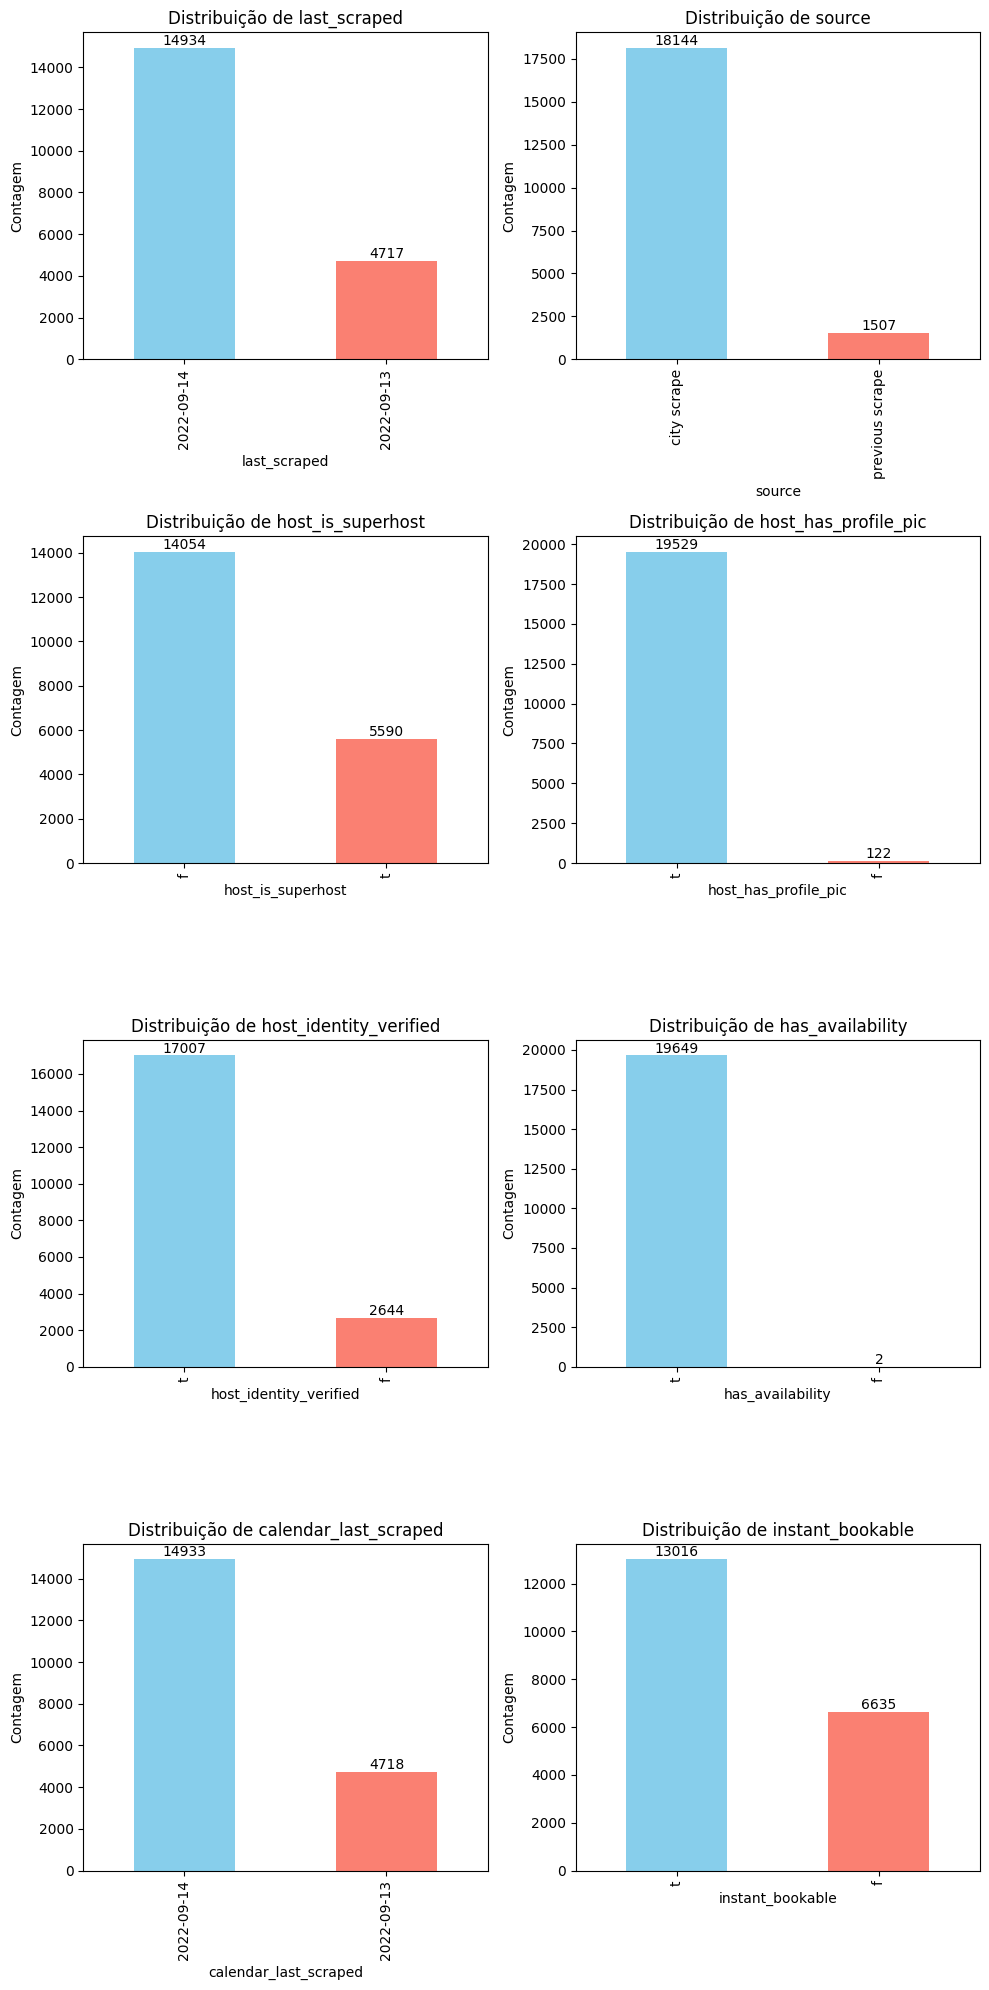

In [ ]:
# Lista das variáveis binárias
variaveis_binarias = ['last_scraped', 'source', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'calendar_last_scraped', 'instant_bookable']

# Define o número de colunas para exibir os gráficos
num_colunas = 2

# Calcula o número de linhas necessário com base no número de variáveis
num_linhas = (len(variaveis_binarias) + num_colunas - 1) // num_colunas

# Cria uma figura com subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 20))

# Loop pelas variáveis binárias e cria os gráficos de barras
for i, var in enumerate(variaveis_binarias):
    linha = i // num_colunas
    coluna = i % num_colunas
    ax = axs[linha, coluna]

    # Contagem dos valores
    counts = dataset_airbnb[var].value_counts()

    # Cria o gráfico de barras
    ax = counts.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])

    # Adiciona anotações com os valores acima das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    # Configurações do gráfico
    ax.set_title(f'Distribuição de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Contagem')

# Remove subplots vazios, se houverem
if len(variaveis_binarias) % 2 != 0:
    fig.delaxes(axs[num_linhas - 1, 1])

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra os gráficos
plt.show()

Posso remover estas colunas uma vez que têm uma distribuição uniforme o que as torna irrelevantes para a análise de previsão de preços.

Vamos agora remover todas as variáveis que até ao momento determinámos como não sendo necessárias para a análise em questão


In [ ]:
dataset_airbnb.drop(columns=['last_scraped', 'source', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'calendar_last_scraped', 'instant_bookable', 'bathrooms', 'calendar_updated'],inplace=True)

In [ ]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19651 entries, 0 to 19650
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19651 non-null  int64  
 1   listing_url                                   19651 non-null  object 
 2   scrape_id                                     19651 non-null  int64  
 3   name                                          19643 non-null  object 
 4   description                                   19632 non-null  object 
 5   neighborhood_overview                         12526 non-null  object 
 6   picture_url                                   19651 non-null  object 
 7   host_id                                       19651 non-null  int64  
 8   host_url                                      19651 non-null  object 
 9   host_name                                     19651 non-null 

Do nosso conjunto de variáveis do dataset sabemos que as variáveis que são URL não irão ser utilizadas para previsão de preço.
Deste modo iremos retirar as seguintes colunas:
  'id', 'listing_url', 'scrape_id', 'picture_url', 'host_id', 'host_url','host_thumbnail_url' e 'host_picture_url'  

In [ ]:
dataset_airbnb.drop(columns=['id', 'listing_url', 'scrape_id', 'picture_url', 'host_id', 'host_url','host_thumbnail_url', 'host_picture_url'],inplace=True)

In [ ]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19651 entries, 0 to 19650
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          19643 non-null  object 
 1   description                                   19632 non-null  object 
 2   neighborhood_overview                         12526 non-null  object 
 3   host_name                                     19651 non-null  object 
 4   host_since                                    19651 non-null  object 
 5   host_location                                 15430 non-null  object 
 6   host_about                                    11655 non-null  object 
 7   host_response_time                            17835 non-null  object 
 8   host_response_rate                            17835 non-null  object 
 9   host_acceptance_rate                          18296 non-null 

In [ ]:
dataset_airbnb.head()

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Casa Ferry Holiday House Lisbon 15min & Beach ...,Our portuguese-style house with spacious terra...,Nice quiet village where the river meets the o...,Joana,2019-07-12,"Trafaria, Portugal","Joana is from Portugal, Arthur is originally f...",within an hour,100%,100%,...,4.90,4.90,4.76,4.71,42622/AL,1,1,0,0,0.56
1,La Caz O Soleil de Lapa (sans cuisine),Oubliez vos soucis dans ce logement spacieux e...,"Quartier calme, restaurants a proximités, bar,...",Christine,2014-10-05,Portugal,NaN,within an hour,100%,100%,...,5.00,5.00,4.63,5.00,Exempt,1,0,1,0,2.14
2,"La maison de la plage, et de la tranquillité",Maison en copropriété privée avec piscine parc...,NaN,Ramiro,2018-03-01,"Geneva, Switzerland",NaN,within an hour,100%,100%,...,4.83,4.83,4.28,4.64,Exempt,2,2,0,0,0.89
3,New Inn Cacilhas - Shared Comfort Bed#2,It's a flat with 2 rooms: 1 private and 1 shar...,"A casa de Joana está localizada em Almada, Set...",Joana,2016-06-16,"Lisbon, Portugal",NaN,within a few hours,77%,59%,...,4.58,4.67,4.33,4.42,107023/AL,4,0,1,3,1.23
4,"Cascais, Fabulous apartment in Luxury Condomin...",Located on the Marginal de Cascais – in Parede...,In the surroundings there are several commerci...,GAL - Gestão De Alojamento Local,2018-04-22,"Carnaxide, Portugal",NaN,within an hour,100%,97%,...,4.50,4.60,4.90,4.60,123277/AL,20,15,5,0,1.75


# Remover nulos

In [ ]:
# Criar um DataFrame com valores nulos, tipos de dados e contagem de valores únicos
nulos = pd.DataFrame({
    'null_values': dataset_airbnb.isnull().mean() * 100, # Porcentagem de valores nulos
    'unique_values': dataset_airbnb.nunique()           # Contagem de valores únicos
                    })

print(nulos)

                                              null_values  unique_values
name                                             0.040710          19321
description                                      0.096687          18359
neighborhood_overview                           36.257697           9415
host_name                                        0.000000           3164
host_since                                       0.000000           3288
host_location                                   21.479823            539
host_about                                      40.690041           3990
host_response_time                               9.241260              4
host_response_rate                               9.241260             65
host_acceptance_rate                             6.895323             93
host_neighbourhood                              51.040660            131
host_listings_count                              0.000000             88
host_total_listings_count                        0.

Para uma análise mais precisa irei retirar todas colunas com valores nulos >=15%.
Deste modo iremos fazer drop das colunas: 'neighborhood_overview', 'host_location', 'host_about', 'host_neighbourhood' e 'neighbourhood'

In [ ]:
dataset_airbnb.drop(columns=['neighborhood_overview', 'host_location', 'host_about', 'host_neighbourhood', 'neighbourhood'],inplace=True)

In [ ]:
# Criar um DataFrame com valores nulos, tipos de dados e contagem de valores únicos
nulos = pd.DataFrame({
    'null_values': dataset_airbnb.isnull().mean() * 100, # Porcentagem de valores nulos
    'unique_values': dataset_airbnb.nunique()           # Contagem de valores únicos
                    })

print(nulos)

                                              null_values  unique_values
name                                             0.040710          19321
description                                      0.096687          18359
host_name                                        0.000000           3164
host_since                                       0.000000           3288
host_response_time                               9.241260              4
host_response_rate                               9.241260             65
host_acceptance_rate                             6.895323             93
host_listings_count                              0.000000             88
host_total_listings_count                        0.000000            102
host_verifications                               0.000000              8
neighbourhood_cleansed                           0.000000            128
neighbourhood_group_cleansed                     0.000000             16
latitude                                         0.

Para as restantes variáveis que têm valores nulos < 15% iremos apenas fazer eliminação de linhas e não da coluna inteira

In [ ]:
# Eliminar linhas com valores nulos
dataset_airbnb = dataset_airbnb.dropna()

# Opcional: redefinir o índice
dataset_airbnb = dataset_airbnb.reset_index(drop=True)

In [ ]:
# Criar um DataFrame com valores nulos, tipos de dados e contagem de valores únicos
nulos = pd.DataFrame({
    'null_values': dataset_airbnb.isnull().mean() * 100, # Porcentagem de valores nulos
    'unique_values': dataset_airbnb.nunique()           # Contagem de valores únicos
                    })

print(nulos)

                                              null_values  unique_values
name                                                  0.0          14142
description                                           0.0          13460
host_name                                             0.0           2489
host_since                                            0.0           2894
host_response_time                                    0.0              4
host_response_rate                                    0.0             57
host_acceptance_rate                                  0.0             87
host_listings_count                                   0.0             78
host_total_listings_count                             0.0             93
host_verifications                                    0.0              6
neighbourhood_cleansed                                0.0            122
neighbourhood_group_cleansed                          0.0             16
latitude                                           

In [ ]:
# Dimensão do Dataset
print(f'number of rows: {dataset_airbnb.shape[0]}')
print(f'number of columns: {dataset_airbnb.shape[1]}')

number of rows: 14312
number of columns: 52


Como não vamos dar uso de qualquer técnica de Neuro-linguistic Programming or NLP podemos fazer drop das colunas 'name' e 'description'

In [ ]:
dataset_airbnb.drop(columns=['name', 'description', 'host_name'],inplace=True)

In [ ]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14312 entries, 0 to 14311
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    14312 non-null  object 
 1   host_response_time                            14312 non-null  object 
 2   host_response_rate                            14312 non-null  object 
 3   host_acceptance_rate                          14312 non-null  object 
 4   host_listings_count                           14312 non-null  int64  
 5   host_total_listings_count                     14312 non-null  int64  
 6   host_verifications                            14312 non-null  object 
 7   neighbourhood_cleansed                        14312 non-null  object 
 8   neighbourhood_group_cleansed                  14312 non-null  object 
 9   latitude                                      14312 non-null 

# Variáveis identicas

minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm

É necessário analisar mas aparenta ter a mesma informação

In [ ]:
dataset_airbnb[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']].head(20)

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,2,1125,2,3,1125,1125,2.0,1125.0
1,1,1125,1,1,1125,1125,1.0,1125.0
2,5,1125,5,5,1125,1125,5.0,1125.0
3,2,90,2,2,90,90,2.0,90.0
4,3,25,3,3,1125,1125,3.0,1125.0
5,2,1125,2,2,1125,1125,2.0,1125.0
6,2,21,2,2,1125,1125,2.0,1125.0
7,1,14,1,1,1125,1125,1.0,1125.0
8,5,1125,5,5,1125,1125,5.0,1125.0
9,2,1125,2,3,1125,1125,2.1,1125.0


Posto isto vamos apenas manter minimum_nights e maximum_night e eliminar o resto

In [ ]:
dataset_airbnb.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights',
'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'],inplace=True)

In [ ]:
dataset_airbnb.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2019-07-12,within an hour,100%,100%,1,1,"['email', 'phone', 'work_email']",Belm,Lisboa,38.671280,...,4.90,4.90,4.76,4.71,42622/AL,1,1,0,0,0.56
1,2014-10-05,within an hour,100%,100%,1,12,"['email', 'phone']",Aveiras de Cima,Azambuja,39.165900,...,5.00,5.00,4.63,5.00,Exempt,1,0,1,0,2.14
2,2018-03-01,within an hour,100%,100%,2,6,"['email', 'phone']",Lourinh e Atalaia,Lourinh,39.306640,...,4.83,4.83,4.28,4.64,Exempt,2,2,0,0,0.89
3,2018-04-22,within an hour,100%,97%,30,53,"['email', 'phone']",Carcavelos e Parede,Cascais,38.684360,...,4.50,4.60,4.90,4.60,123277/AL,20,15,5,0,1.75
4,2018-09-04,within an hour,100%,96%,3,3,"['email', 'phone']",Lourinh e Atalaia,Lourinh,39.308548,...,4.92,4.92,4.83,4.33,84329/AL,3,3,0,0,0.27


In [ ]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14312 entries, 0 to 14311
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    14312 non-null  object 
 1   host_response_time                            14312 non-null  object 
 2   host_response_rate                            14312 non-null  object 
 3   host_acceptance_rate                          14312 non-null  object 
 4   host_listings_count                           14312 non-null  int64  
 5   host_total_listings_count                     14312 non-null  int64  
 6   host_verifications                            14312 non-null  object 
 7   neighbourhood_cleansed                        14312 non-null  object 
 8   neighbourhood_group_cleansed                  14312 non-null  object 
 9   latitude                                      14312 non-null 

->host_response_rate; host_acceptance_rate

->host_listings_count; host_total_listings_count; calculated_host_listings_count; calculated_host_listings_count_entire_homes; calculated_host_listings_count_private_rooms; calculated_host_listings_count_shared_rooms

->neighbourhood_cleansed; neighbourhood_group_cleansed; latitude; longitude

 * **
->availability_30; availability_60; availability_90; availability_365

->number_of_reviews; number_of_reviews_ltm; number_of_reviews_l30d**



In [ ]:
dataset_airbnb['host_response_rate'] = dataset_airbnb['host_response_rate'].str.rstrip('%').astype(float) / 100
dataset_airbnb['host_acceptance_rate'] = dataset_airbnb['host_acceptance_rate'].str.rstrip('%').astype(float) / 100

In [ ]:
dataset_airbnb.dtypes

host_since                                       object
host_response_time                               object
host_response_rate                              float64
host_acceptance_rate                            float64
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                               object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                       

In [ ]:
display(dataset_airbnb[['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']].head(50))

,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,1,1,1,1,0,0
1,1,12,1,0,1,0
2,2,6,2,2,0,0
3,30,53,20,15,5,0
4,3,3,3,3,0,0
5,7,7,7,0,3,4
6,1,2,1,1,0,0
7,2,4,2,0,2,0
8,4,6,1,1,0,0
9,1,1,1,1,0,0


Vou deixar apenas a coluna calculated_host_listings_count

In [ ]:
dataset_airbnb.drop(columns=['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'],inplace=True)

In [ ]:
display(dataset_airbnb[['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude']].head(50))

,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude
0,Belm,Lisboa,38.671280,-9.230640
1,Aveiras de Cima,Azambuja,39.165900,-8.884790
2,Lourinh e Atalaia,Lourinh,39.306640,-9.337600
3,Carcavelos e Parede,Cascais,38.684360,-9.351100
4,Lourinh e Atalaia,Lourinh,39.308548,-9.338993
5,Santo Isidoro,Mafra,38.987940,-9.420850
6,Santa Maria Maior,Lisboa,38.712410,-9.127060
7,Estrela,Lisboa,38.684052,-9.154102
8,Santa Maria Maior,Lisboa,38.710820,-9.127190
9,Santa Maria Maior,Lisboa,38.711560,-9.129870


Com base na tabela percebemos que a coluna neighbourhood_group_cleansed não acrescenta muita informação. Como tal, vamos retirar esta coluna do nosso dataset


In [ ]:
dataset_airbnb.drop(columns=['neighbourhood_group_cleansed'],inplace=True)

In [ ]:
dataset_airbnb.dtypes

host_since                         object
host_response_time                 object
host_response_rate                float64
host_acceptance_rate              float64
host_verifications                 object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                          float64
beds                              float64
amenities                          object
price                              object
minimum_nights                      int64
maximum_nights                      int64
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm             

# Converter data types

Vamos agora converter todos as variáveis objeto para um tipo de dados admissivel para correr modelos de previsão

-> host_since, host_response_time, host_verifications, property_type, room_type, bathrooms_text, amenities, price, first_review, last_review, license

In [ ]:
#Vamos converter todas as colunas de data para o tipo datatime

#Todas as colunas de data
colunas_de_data = ['host_since', 'first_review', 'last_review']

# Use um loop para converter cada coluna de data
for coluna in colunas_de_data:
    dataset_airbnb[coluna] = pd.to_datetime(dataset_airbnb[coluna])

In [ ]:
display(dataset_airbnb[['host_since', 'first_review', 'last_review']].head(50))

,host_since,first_review,last_review
0,2019-07-12,2019-08-11,2022-09-03
1,2014-10-05,2022-05-25,2022-08-31
2,2018-03-01,2019-04-20,2022-08-18
3,2018-04-22,2022-03-27,2022-08-26
4,2018-09-04,2019-01-03,2022-08-29
5,2017-03-23,2017-07-15,2022-04-05
6,2010-04-12,2014-04-24,2022-09-11
7,2013-08-06,2022-04-05,2022-09-12
8,2010-05-16,2011-01-01,2022-09-05
9,2010-05-17,2012-05-22,2022-09-09


In [ ]:
display(dataset_airbnb[['host_response_time', 'host_verifications', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'license']].head(50))

,host_response_time,host_verifications,property_type,room_type,bathrooms_text,amenities,price,license
0,within an hour,"['email', 'phone', 'work_email']",Entire home,Entire home/apt,1 bath,"[""Game console"", ""Shampoo"", ""Fire extinguisher...",$95.00,42622/AL
1,within an hour,"['email', 'phone']",Private room in guesthouse,Private room,1 private bath,"[""Free parking on premises"", ""Bed linens"", ""Sm...",$25.00,Exempt
2,within an hour,"['email', 'phone']",Entire home,Entire home/apt,3 baths,"[""Waterfront"", ""Baby safety gates"", ""Washer"", ...",$65.00,Exempt
3,within an hour,"['email', 'phone']",Entire rental unit,Entire home/apt,3 baths,"[""Washer"", ""Fire extinguisher"", ""Pool"", ""Free ...",$174.00,123277/AL
4,within an hour,"['email', 'phone']",Entire rental unit,Entire home/apt,1 bath,"[""Waterfront"", ""Shampoo"", ""Fire extinguisher"",...",$59.00,84329/AL
5,within a day,"['email', 'phone']",Shared room in home,Shared room,3 shared baths,"[""Washer"", ""Fire extinguisher"", ""Free parking ...",$25.00,49895/AL
6,within an hour,"['email', 'phone']",Entire rental unit,Entire home/apt,1 bath,"[""Washer"", ""Shampoo"", ""Fire extinguisher"", ""Ca...",$54.00,56539/AL.
7,within an hour,"['email', 'phone']",Private room in condo,Private room,1 shared bath,"[""Shampoo"", ""Fire extinguisher"", ""Drying rack ...",$29.00,56538/AL
8,within an hour,"['email', 'phone', 'work_email']",Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Luggage dropoff allowed"", ""Coo...",$90.00,23535/AL
9,within an hour,"['email', 'phone']",Entire rental unit,Entire home/apt,1 bath,"[""Waterfront"", ""Fire extinguisher"", ""Cleaning ...",$60.00,28737/AL


Vamos fazer drop de host_verifications e license pois não tem qualquer utilidade para nós. Em relação ao preço retiramos o $ e a ',' e só depois convertemos para numérico. As restantes colunas terão que ser analisadas com mais cuidado

In [ ]:
dataset_airbnb.drop(columns=['host_verifications', 'license'],inplace=True)

# Opcional: redefinir o índice se desejar
dataset_airbnb = dataset_airbnb.reset_index(drop=True)

In [ ]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14312 entries, 0 to 14311
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_since                      14312 non-null  datetime64[ns]
 1   host_response_time              14312 non-null  object        
 2   host_response_rate              14312 non-null  float64       
 3   host_acceptance_rate            14312 non-null  float64       
 4   neighbourhood_cleansed          14312 non-null  object        
 5   latitude                        14312 non-null  float64       
 6   longitude                       14312 non-null  float64       
 7   property_type                   14312 non-null  object        
 8   room_type                       14312 non-null  object        
 9   accommodates                    14312 non-null  int64         
 10  bathrooms_text                  14312 non-null  object        
 11  be

In [ ]:
# 1. Remova os caracteres especiais
dataset_airbnb['price'] = dataset_airbnb['price'].str.replace('[\$,]', '', regex=True)

# 2. Converta a coluna para o tipo numérico (float)
dataset_airbnb['price'] = pd.to_numeric(dataset_airbnb['price'], errors='coerce')

In [ ]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14312 entries, 0 to 14311
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_since                      14312 non-null  datetime64[ns]
 1   host_response_time              14312 non-null  object        
 2   host_response_rate              14312 non-null  float64       
 3   host_acceptance_rate            14312 non-null  float64       
 4   neighbourhood_cleansed          14312 non-null  object        
 5   latitude                        14312 non-null  float64       
 6   longitude                       14312 non-null  float64       
 7   property_type                   14312 non-null  object        
 8   room_type                       14312 non-null  object        
 9   accommodates                    14312 non-null  int64         
 10  bathrooms_text                  14312 non-null  object        
 11  be

In [ ]:
dataset_airbnb.host_response_time.value_counts(normalize=True)

within an hour        0.844606
within a few hours    0.099707
within a day          0.044927
a few days or more    0.010760
Name: host_response_time, dtype: float64

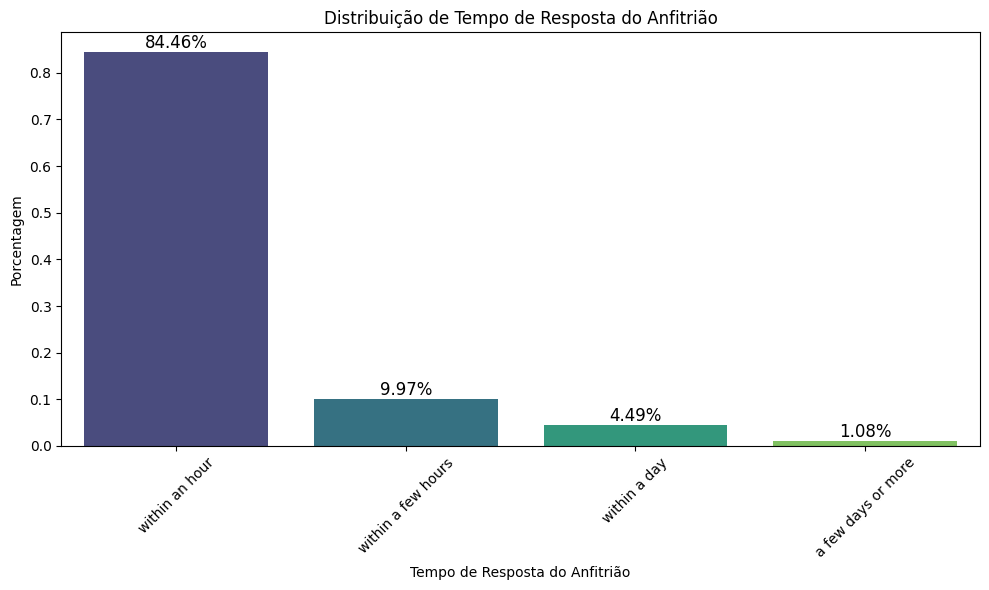

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular as contagens normalizadas dos valores na coluna "host_response_time"
response_time_counts = dataset_airbnb['host_response_time'].value_counts(normalize=True)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Tamanho da figura
sns.barplot(x=response_time_counts.index, y=response_time_counts.values, palette="viridis")
plt.title('Distribuição de Tempo de Resposta do Anfitrião')
plt.xlabel('Tempo de Resposta do Anfitrião')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade

# Adicionar os valores de porcentagem no topo das barras
for i, v in enumerate(response_time_counts.values):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom', fontsize=12)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

A similar story is true for host_response_rate, with about a third of values being null. This will also be kept as its own category, after grouping other values into meaningful groups (i.e. transforming this into a categorical feature, rather than a numerical one). Because about 75% of hosts respond 100% of the time, this will be kept as its own category, and other values will be grouped into bins.

In [ ]:
dataset_airbnb.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2019-07-12,within an hour,1.0,1.00,Belm,38.671280,-9.230640,Entire home,Entire home/apt,6,...,2022-09-03,4.86,4.86,4.76,4.90,4.90,4.76,4.71,1,0.56
1,2014-10-05,within an hour,1.0,1.00,Aveiras de Cima,39.165900,-8.884790,Private room in guesthouse,Private room,2,...,2022-08-31,5.00,5.00,4.88,5.00,5.00,4.63,5.00,1,2.14
2,2018-03-01,within an hour,1.0,1.00,Lourinh e Atalaia,39.306640,-9.337600,Entire home,Entire home/apt,6,...,2022-08-18,4.78,4.78,4.83,4.83,4.83,4.28,4.64,2,0.89
3,2018-04-22,within an hour,1.0,0.97,Carcavelos e Parede,38.684360,-9.351100,Entire rental unit,Entire home/apt,4,...,2022-08-26,4.60,4.40,4.50,4.50,4.60,4.90,4.60,20,1.75
4,2018-09-04,within an hour,1.0,0.96,Lourinh e Atalaia,39.308548,-9.338993,Entire rental unit,Entire home/apt,4,...,2022-08-29,4.25,4.75,4.67,4.92,4.92,4.83,4.33,3,0.27


In [ ]:
# Selecione a coluna 'host_response_rate' e use describe
estatisticas = dataset_airbnb['host_response_rate'].describe()

# Exiba as estatísticas resumidas
print(estatisticas)

count    14312.000000
mean         0.967809
std          0.104004
min          0.000000
25%          0.990000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_response_rate, dtype: float64


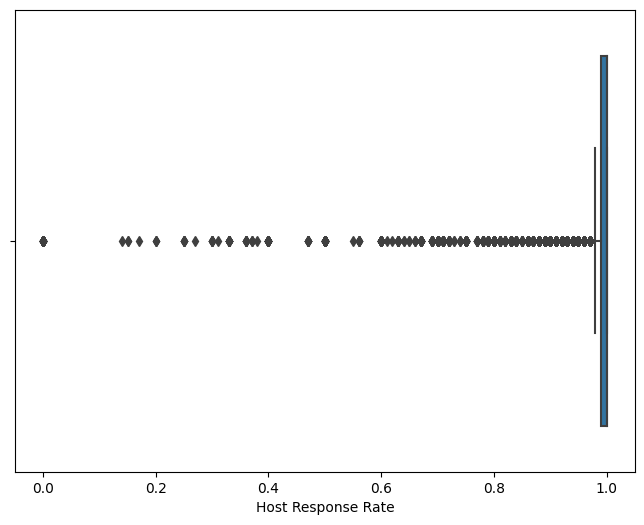

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie um boxplot para 'host_response_rate'
plt.figure(figsize=(8, 6))
sns.boxplot(x='host_response_rate', data=dataset_airbnb)

# Adicione rótulo ao eixo x
plt.xlabel('Host Response Rate')

# Mostre o gráfico
plt.show()

<ipython-input-46-04077ce9dd70>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataset_airbnb, x='host_response_rate', bins=bins, palette='viridis')


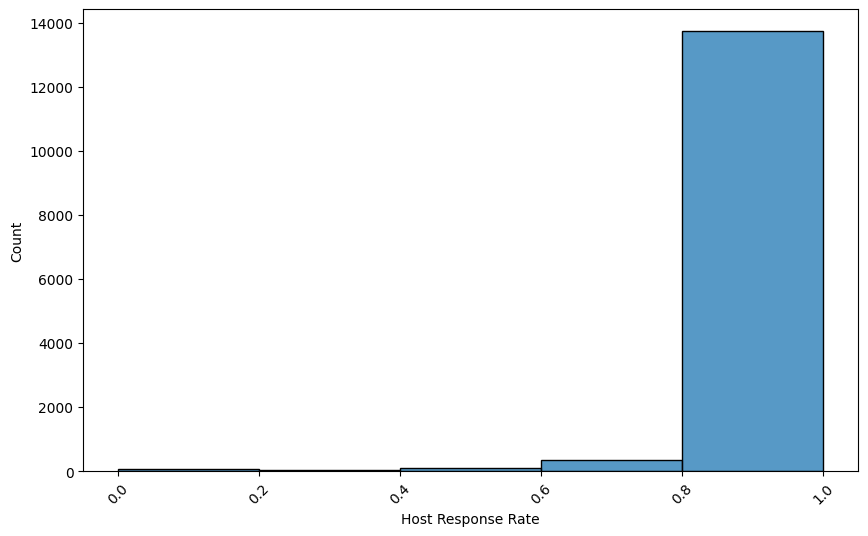

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar intervalos de 0.20
bins = [0, 0.20, 0.40, 0.60, 0.80, 1.00]

# Rotule os intervalos
labels = ['0-0.20', '0.20-0.40', '0.40-0.60', '0.60-0.80', '0.80-1.00']

# Crie um gráfico de barras diretamente com os intervalos
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_airbnb, x='host_response_rate', bins=bins, palette='viridis')

# Adicione rótulos ao eixo x e y
plt.xlabel('Host Response Rate')
plt.ylabel('Count')

# Rotacione os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Mostre o gráfico
plt.show()

<ipython-input-47-ac17816a081d>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataset_airbnb, x='host_response_rate', bins=bins, palette='viridis')
<ipython-input-47-ac17816a081d>:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataset_airbnb, x='host_acceptance_rate', bins=bins, palette='viridis')


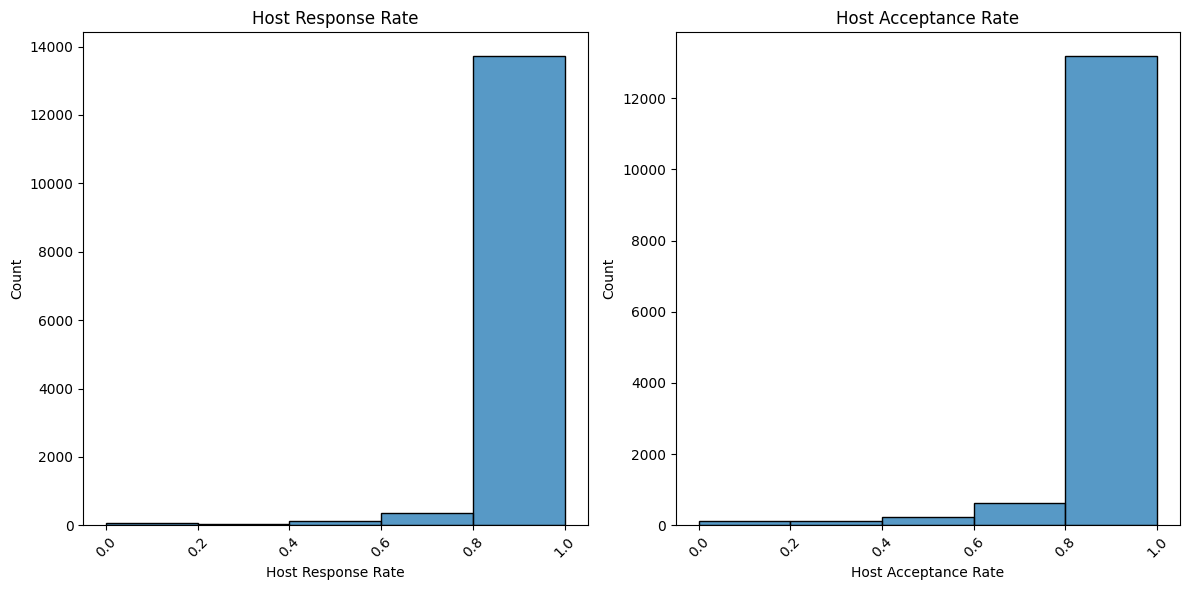

In [ ]:
# Criar intervalos de 0.20
bins = [0, 0.20, 0.40, 0.60, 0.80, 1.00]

# Rotule os intervalos
labels = ['0-0.20', '0.20-0.40', '0.40-0.60', '0.60-0.80', '0.80-1.00']

# Criar um gráfico de barras para host_response_rate
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=dataset_airbnb, x='host_response_rate', bins=bins, palette='viridis')

# Adicionar rótulos ao eixo x e y
plt.xlabel('Host Response Rate')
plt.ylabel('Count')
plt.title('Host Response Rate')

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Criar um gráfico de barras para host_acceptance_rate
plt.subplot(1, 2, 2)
sns.histplot(data=dataset_airbnb, x='host_acceptance_rate', bins=bins, palette='viridis')

# Adicionar rótulos ao eixo x e y
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Count')
plt.title('Host Acceptance Rate')

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Ajustar a posição dos gráficos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

In [ ]:
dataset_airbnb

,host_since,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2019-07-12,within an hour,1.00,1.00,Belm,38.671280,-9.230640,Entire home,Entire home/apt,6,...,2022-09-03,4.86,4.86,4.76,4.90,4.90,4.76,4.71,1,0.56
1,2014-10-05,within an hour,1.00,1.00,Aveiras de Cima,39.165900,-8.884790,Private room in guesthouse,Private room,2,...,2022-08-31,5.00,5.00,4.88,5.00,5.00,4.63,5.00,1,2.14
2,2018-03-01,within an hour,1.00,1.00,Lourinh e Atalaia,39.306640,-9.337600,Entire home,Entire home/apt,6,...,2022-08-18,4.78,4.78,4.83,4.83,4.83,4.28,4.64,2,0.89
3,2018-04-22,within an hour,1.00,0.97,Carcavelos e Parede,38.684360,-9.351100,Entire rental unit,Entire home/apt,4,...,2022-08-26,4.60,4.40,4.50,4.50,4.60,4.90,4.60,20,1.75
4,2018-09-04,within an hour,1.00,0.96,Lourinh e Atalaia,39.308548,-9.338993,Entire rental unit,Entire home/apt,4,...,2022-08-29,4.25,4.75,4.67,4.92,4.92,4.83,4.33,3,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14307,2011-07-31,within an hour,1.00,0.99,Misericrdia,38.685210,-9.149190,Entire rental unit,Entire home/apt,5,...,2022-08-11,4.66,4.83,4.69,4.97,5.00,4.66,4.62,5,0.86
14308,2018-01-26,within an hour,1.00,1.00,Estrela,38.685380,-9.150210,Entire rental unit,Entire home/apt,5,...,2022-08-27,4.82,4.88,4.93,4.99,4.97,4.84,4.82,1,1.24
14309,2016-04-04,within an hour,1.00,0.89,Estrela,38.680040,-9.154540,Entire rental unit,Entire home/apt,4,...,2022-09-01,4.86,4.86,4.71,5.00,5.00,4.93,4.64,3,0.38
14310,2021-11-16,within a few hours,0.79,0.83,Belm,38.672380,-9.232960,Private room in serviced apartment,Private room,6,...,2022-08-16,5.00,4.67,5.00,5.00,5.00,3.67,4.00,10,0.60


Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories Apartment, House, Room and Shared Room and Other will be used, as most properties can be classified as either apartment ,house or room.

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Property type e Room type

In [ ]:
display(dataset_airbnb.property_type.value_counts())

Entire rental unit                    8520
Private room in rental unit           1542
Entire home                            764
Entire condo                           535
Entire villa                           320
Entire serviced apartment              269
Private room in home                   250
Entire loft                            171
Private room in condo                  138
Entire townhouse                       132
Room in boutique hotel                 130
Private room in guesthouse             124
Private room in villa                  120
Entire cottage                         112
Private room in bed and breakfast      106
Entire vacation home                    87
Private room in casa particular         73
Private room in hostel                  62
Private room in serviced apartment      60
Private room in guest suite             60
Entire guesthouse                       54
Shared room in hostel                   50
Room in serviced apartment              44
Tiny home  

In [ ]:
display(dataset_airbnb.room_type.value_counts())

Entire home/apt    11237
Private room        2804
Shared room          149
Hotel room           122
Name: room_type, dtype: int64

Devido à elevada diversidade de tipos de propriedade vamos manter a nossa análise restringida ao tipo de quarto. Deste modo não vamos precisar da coluna property_type

In [ ]:
dataset_airbnb.drop(columns=['property_type'],inplace=True)

Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including

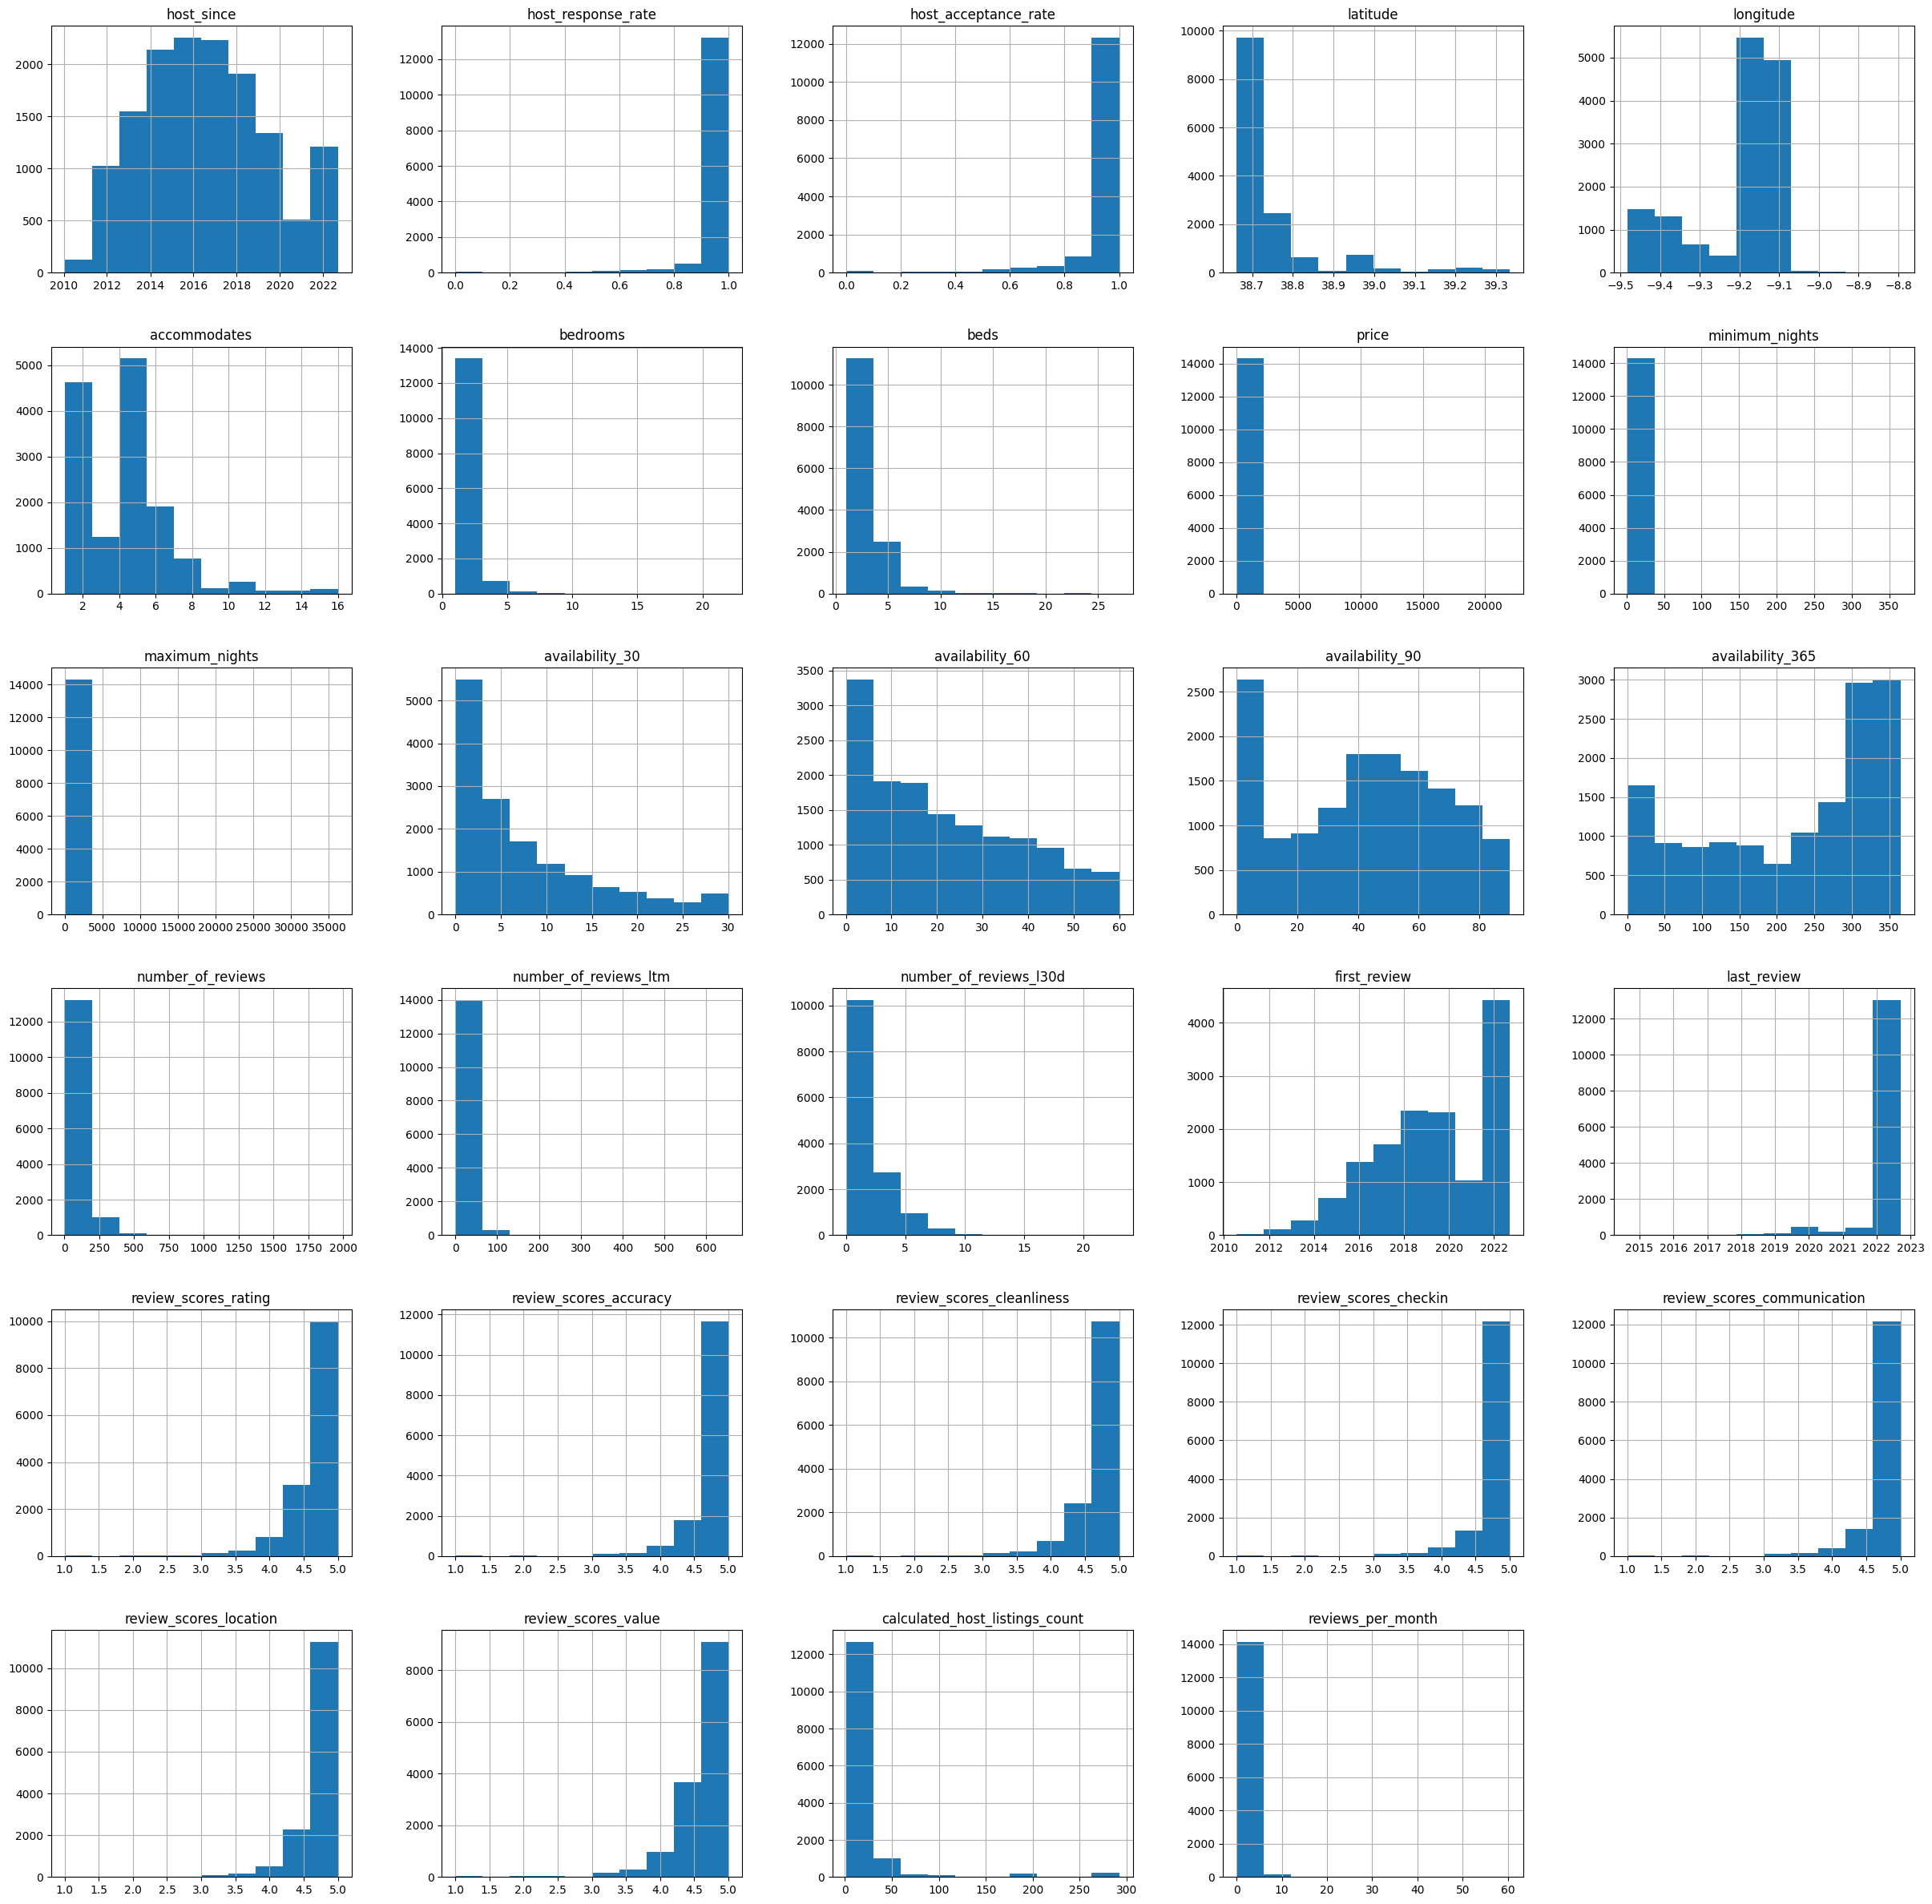

In [ ]:
# Replacing columns with f/t with 0/1
dataset_airbnb.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
dataset_airbnb.hist(figsize=(30,30));

In [ ]:
dataset_airbnb.shape

(14312, 34)

host_response_time, Host_response_rate e host_acceptance_rate estão muito agrupados no 1. O que torna estas duas variáveis irrelevantes. Vamos fazer drop

*host_since* is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (September 10, 2022). The original column will be left in initially for EDA, and dropped later.

In [ ]:
dataset_airbnb.drop(columns=['host_response_rate', 'host_acceptance_rate', 'host_response_time'],inplace=True)

In [ ]:
#Já convertemos as colunas 'host_since', 'first_review', 'last_review' para DateTime

# Calculating the number of days
#dataset_airbnb['host_days_active'] = (pd.datetime(2022, 9, 10) - dataset_airbnb.host_since).astype('timedelta64[D]')

# Printing mean and median
#print("Mean days as host:", round(dataset_airbnb['host_days_active'].mean(),0))
#print("Median days as host:", dataset_airbnb['host_days_active'].median())

# Replacing null values with the median
#dataset_airbnb.host_days_active.fillna(dataset_airbnb.host_days_active.median(), inplace=True)

In [ ]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14312 entries, 0 to 14311
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_since                      14312 non-null  datetime64[ns]
 1   neighbourhood_cleansed          14312 non-null  object        
 2   latitude                        14312 non-null  float64       
 3   longitude                       14312 non-null  float64       
 4   room_type                       14312 non-null  object        
 5   accommodates                    14312 non-null  int64         
 6   bathrooms_text                  14312 non-null  object        
 7   bedrooms                        14312 non-null  float64       
 8   beds                            14312 non-null  float64       
 9   amenities                       14312 non-null  object        
 10  price                           14312 non-null  float64       
 11  mi

In [ ]:
# lets have a lool where stand with our null values
total_nan = dataset_airbnb.isna().sum().sort_values(ascending=False)
percentage_nan = (total_nan / dataset_airbnb.shape[0]) * 100
tabel = pd.concat([total_nan, percentage_nan], axis=1, keys=['Total NaN values', 'Percentage of NaN values'])
tabel

,Total NaN values,Percentage of NaN values
host_since,0,0.0
availability_365,0,0.0
calculated_host_listings_count,0,0.0
review_scores_value,0,0.0
review_scores_location,0,0.0
review_scores_communication,0,0.0
review_scores_checkin,0,0.0
review_scores_cleanliness,0,0.0
review_scores_accuracy,0,0.0
review_scores_rating,0,0.0


In [ ]:
# Resetting the index as we deleted some rows
dataset_airbnb.reset_index(drop=True, inplace=True)

 `Amenities-NLP`

# Guardar o dataset

In [ ]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14312 entries, 0 to 14311
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_since                      14312 non-null  datetime64[ns]
 1   neighbourhood_cleansed          14312 non-null  object        
 2   latitude                        14312 non-null  float64       
 3   longitude                       14312 non-null  float64       
 4   room_type                       14312 non-null  object        
 5   accommodates                    14312 non-null  int64         
 6   bathrooms_text                  14312 non-null  object        
 7   bedrooms                        14312 non-null  float64       
 8   beds                            14312 non-null  float64       
 9   amenities                       14312 non-null  object        
 10  price                           14312 non-null  float64       
 11  mi

In [ ]:

dataset_airbnb.to_csv('Recolha e tratamento da base de dados Parte 1.csv', index=False)

In [ ]:
# Para criar um link de download para o arquivo CSV
from google.colab import files

files.download('Recolha e tratamento da base de dados Parte 1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>